In [2]:
import pandas as pd
#from WindPy import w
import numpy as np
#w.start()





In [3]:
# 定义原始代码列表和需要移除的代码列表
original_codes = [
    "S.CBT"
    , "M.DCE", "Y.DCE", "P.DCE", "SB.NYB", "SR.CZC", "CT.NYB", "CF.CZC", "RM.CZC",
    "C.CBT", "C.DCE", "CS.DCE", "JD.DCE", "OI.CZC", "A.DCE", "LH.DCE", "PK.CZC", "RR.DCE",
    "BO.CBT", "SM.CBT", "W.CBT", "RR.CBT", "LC.CME", "LH.CME", "O.CBT", "YK.CBT", "YC.CBT",
    "YW.CBT", "FC.CME", "DA.CME", "OJ.NYB", "CC.NYB", "KC.NYB", "TT.NYM", "YO.NYM", "CJ.NYM",
    "KT.NYM", "BB.DCE", "FB.DCE", "RI.CZC", "LR.CZC", "JR.CZC", "PM.CZC", "WH.CZC", "RS.CZC",
    "B.DCE", "CJ.CZC", "CA.LME", "CU.SHF", "BC.INE", "HG.CMX", "ZS.LME", "ZN.SHF", "NI.LME",
    "NI.SHF", "RB.SHF", "AH.LME", "AL.SHF", "AO.SHF", "SN.LME", "SN.SHF", "PB.LME", "PB.SHF",
    "HC.SHF", "CO.LME", 
    "I.DCE"
    , "FEF.SG", "AA.LME", "LRAF.HK", "LRZF.HK", "LRSF.HK", "LRPF.HK",
    "LRNF.HK", "LRCF.HK", "SM.CZC", "SF.CZC", "SI.GFE", "WR.SHF", "SS.SHF", "SPTAUUSDOZ.IDC",
    "SPTAGUSDOZ.IDC", "GC.CMX", "SI.CMX", "AU.SHF", "AG.SHF", "AU(T+D).SGE", "AG(T+D).SGE",
    "AU9999.SGE", "SPTPTUSDOZ.IDC", "SPTPDUSDOZ.IDC", "PL.NYM", "PA.NYM", "MGC.CMX", "QO.CMX",
    "QI.CMX", "CL.NYM", "B.IPE", "T.IPE", "SC.INE", "LU.INE", "NG.NYM", "BU.SHF", "L.DCE", "PF.CZC",
    "TA.CZC", "PP.DCE", "EB.DCE", "RU.SHF", "NR.INE", "JM.DCE", "J.DCE", "ZC.CZC", "UR.CZC",
    "PG.DCE", "MA.CZC", "EG.DCE", "V.DCE", "FG.CZC", "SA.CZC", "SP.SHF", "RB.NYM", "HO.NYM",
    "QG.NYM", "QM.NYM", "N.IPE", "G.IPE", "BZ.NYM", "O.IPE", "ZE.CBT", "ATW.IPE", "AFR.IPE", "FU.SHF"
]





In [4]:
filtered_codes_by_oi_mean = []

# 存放OI均值大于100000的合约
filtered_codes_by_oi_mean = []

for code in original_codes:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    try:
        df = pd.read_csv(file_path)  # 尝试加载数据
        oi_mean = df['OI'].mean()  # 计算OI的均值
        if oi_mean > 100000:  # 判断OI均值是否大于100000
            filtered_codes_by_oi_mean.append(code)  # 如果是，则添加到筛选列表中
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到，跳过并继续。")  # 打印错误消息并继续


文件 SPTAUUSDOZ.IDC_weighted.csv 未找到，跳过并继续。


In [5]:
# 初始化一个空的DataFrame来存储所有统计值
all_describe = pd.DataFrame()

for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据
    stats = df.describe()  # 获取基本统计值
    
    # 调整stats DataFrame，使其包含合约代码作为一部分信息
    stats = stats.rename(columns=lambda x: f"{code}_{x}")
    
    # 将当前文件的统计值合并到总统计表中
    if all_describe.empty:
        all_describe = stats
    else:
        all_describe = pd.concat([all_describe, stats], axis=1)

# 打印合并后的统计表和加总的count值
print("合并后的统计表:")
print(all_describe)


合并后的统计表:
        S.CBT_OPEN   S.CBT_HIGH    S.CBT_LOW  S.CBT_CLOSE   S.CBT_VOLUME  \
count  1577.000000  1577.000000  1577.000000  1577.000000    1577.000000   
mean   1133.977612  1144.217322  1124.596238  1158.598403  206832.089410   
std     280.911254   284.680749   277.360904   238.633155   76566.749942   
min       0.000000     0.000000     0.000000   815.742051       0.000000   
25%     914.083212   919.781819   908.058605   918.456274  155564.000000   
50%    1094.193817  1133.929945  1091.499238  1157.173141  197250.000000   
75%    1362.078191  1373.784718  1345.294060  1366.009320  250082.000000   
max    1637.594930  1682.763724  1624.226996  1638.574742  737680.000000   

           S.CBT_OI   M.DCE_OPEN   M.DCE_HIGH    M.DCE_LOW  M.DCE_CLOSE  ...  \
count  1.577000e+03  1601.000000  1601.000000  1601.000000  1601.000000  ...   
mean   7.513130e+05  3250.870155  3277.744499  3223.816031  3251.645418  ...   
std    9.729950e+04   453.421118   461.578035   445.808282   454.6

In [6]:
# 初始化OI列的count加总值
total_oi_count = 0

# 通过列名筛选出所有的_OI列
oi_columns = [col for col in all_describe.columns if col.endswith('_OI')]

# 只从'all_describe'的'count'行中获取这些_OI列的值进行加总
total_oi_count = all_describe.loc['count', oi_columns].sum()

print(f"所有筛选后文件中OI列的count总和为: {total_oi_count}")


所有筛选后文件中OI列的count总和为: 101931.0


In [7]:
import pandas as pd
import numpy as np


for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据

    # 在替换之前计算NaN的数量
    initial_na_count = df.isna().sum().sum()

    # 将所有的0值替换为NaN
    df.replace(0, np.nan, inplace=True)

    # 替换之后计算NaN的数量
    post_replace_na_count = df.isna().sum().sum()

    # 计算替换操作增加的NaN数量
    replaced_na_count = post_replace_na_count - initial_na_count

    # 报告替换了多少个NaN
   # print(f"文件 {code} 替换了 {replaced_na_count} 个0值为NaN。")


In [8]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import talib

def create_labels(df, col_name, window_size=11):
    """
    Data is labeled as per the logic in research paper
    Label code: BUY => 1, SELL => 0, HOLD => 2
    params:
        df => Dataframe with data
        col_name => name of column which should be used to determine strategy
    returns: numpy array with integer codes for labels with
             size = total-(window_size)+1
    """
    print("Calculating labels")
    total_rows = len(df)
    labels = np.zeros(total_rows)
    labels[:] = np.nan
    pbar = tqdm(total=total_rows)
    row_counter = 0

    while row_counter < total_rows:
        if row_counter >= window_size - 1:
            window_begin = row_counter - (window_size - 1)
            window_end = row_counter
            window_middle = int((window_begin + window_end) / 2)

            min_ = np.inf
            min_index = -1
            max_ = -np.inf
            max_index = -1
            for i in range(window_begin, window_end + 1):
                price = df.iloc[i][col_name]
                if price < min_:
                    min_ = price
                    min_index = i
                if price > max_:
                    max_ = price
                    max_index = i

            if max_index == window_middle:
                labels[window_middle] = 0
            elif min_index == window_middle:
                labels[window_middle] = 1
            else:
                labels[window_middle] = 2

        row_counter += 1
        pbar.update(1)
    pbar.close()
    return labels

In [19]:
import os
import joblib
import pandas as pd
import numpy as np
import talib
from sklearn.preprocessing import MinMaxScaler

#for code in filtered_codes_by_oi_mean:
for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_weighted.csv"  # 构建文件路径
    df = pd.read_csv(file_path)  # 加载数据

    # 将所有的0值替换为NaN
    df.replace(0, np.nan, inplace=True)
    
    df = df.sort_index(ascending=True)
    # 计算SMA 20日移动平均
    df['SMA_20'] = talib.SMA(df['CLOSE'], timeperiod=20)

     # 计算SMA 20日移动平均
    df['SMA_100'] = talib.SMA(df['CLOSE'], timeperiod=50)

     # 计算SMA 20日移动平均
    df['SMA_200'] = talib.SMA(df['CLOSE'], timeperiod=150)
    
    
    # 计算RSI 14日相对强弱指数
    df['RSI_14'] = talib.RSI(df['CLOSE'], timeperiod=14)

    # 计算RSI 14日相对强弱指数
    df['RSI_30'] = talib.RSI(df['CLOSE'], timeperiod=30)
    
    # 计算布林带
    df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['CLOSE'], timeperiod=40, nbdevup=2, nbdevdn=2, matype=0)
    
    # MACD
    df['macd'], df['macdsignal'], df['macdhist'] = talib.MACD(df['CLOSE'], fastperiod=12, slowperiod=26, signalperiod=9)
    
    # On-Balance Volume
    df['obv'] = talib.OBV(df['CLOSE'], df['VOLUME'])
    
    # Average True Range
    df['atr'] = talib.ATR(df['HIGH'], df['LOW'], df['CLOSE'], timeperiod=14)
    
    df['label'] = create_labels(df, 'CLOSE', window_size=11)
    
    df_cleaned = df.dropna()
    
    df_cleaned.to_csv(f"{code}_technical.csv", index=False)

    scalers_directory = 'scalers'
    if not os.path.exists(scalers_directory):
        os.makedirs(scalers_directory)

    feature_columns = df.columns[1:-1]  # 选择需要缩放的特征列

    for feature in feature_columns:
        if df[feature].notnull().any():  # 确保特征列不全是NaN
            scaler = MinMaxScaler()
            df[feature] = scaler.fit_transform(df[[feature]].fillna(0))  # 使用fillna(0)处理NaN

            # 保存每个特征的Scaler到指定文件夹
            scaler_filename = os.path.join(scalers_directory, f"{code}_{feature}_scaler.pkl")
            joblib.dump(scaler, scaler_filename)

    df_cleaned = df.dropna()
    df_cleaned.to_csv(f"{code}_technical.csv", index=False)




Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1432.61it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1620.92it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1588.19it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1522.27it/s]


Calculating labels


100%|██████████| 1575/1575 [00:01<00:00, 1484.62it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1553.06it/s]


Calculating labels


100%|██████████| 1575/1575 [00:00<00:00, 1611.67it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1595.18it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1629.18it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1466.39it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1565.92it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1613.68it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1605.91it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1565.84it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1577.67it/s]


Calculating labels


100%|██████████| 777/777 [00:00<00:00, 1660.71it/s]


Calculating labels


100%|██████████| 761/761 [00:00<00:00, 1557.55it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1598.68it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1645.98it/s]


Calculating labels


100%|██████████| 1577/1577 [00:01<00:00, 1404.18it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1635.71it/s]


Calculating labels


100%|██████████| 1577/1577 [00:00<00:00, 1639.82it/s]


Calculating labels


100%|██████████| 1575/1575 [00:01<00:00, 1539.58it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1615.98it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1632.04it/s]


Calculating labels


100%|██████████| 1578/1578 [00:00<00:00, 1614.22it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1650.09it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1626.44it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1522.11it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1526.39it/s]


Calculating labels


100%|██████████| 186/186 [00:00<00:00, 1758.31it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1556.23it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1631.55it/s]


Calculating labels


100%|██████████| 1592/1592 [00:00<00:00, 1614.95it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1582.62it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1617.66it/s]


Calculating labels


100%|██████████| 303/303 [00:00<00:00, 1659.84it/s]


Calculating labels


100%|██████████| 1089/1089 [00:00<00:00, 1615.94it/s]


Calculating labels


100%|██████████| 1580/1580 [00:00<00:00, 1582.13it/s]


Calculating labels


100%|██████████| 1579/1579 [00:00<00:00, 1637.20it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1583.66it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1568.19it/s]


Calculating labels


100%|██████████| 1580/1580 [00:01<00:00, 1275.19it/s]


Calculating labels


100%|██████████| 1594/1594 [00:01<00:00, 1486.14it/s]


Calculating labels


100%|██████████| 1594/1594 [00:01<00:00, 1518.74it/s]


Calculating labels


100%|██████████| 912/912 [00:00<00:00, 1552.92it/s]


Calculating labels


100%|██████████| 1580/1580 [00:00<00:00, 1626.94it/s]


Calculating labels


100%|██████████| 1601/1601 [00:00<00:00, 1608.17it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1359.14it/s]


Calculating labels


100%|██████████| 840/840 [00:00<00:00, 1554.60it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1373.98it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1500.80it/s]


Calculating labels


100%|██████████| 1088/1088 [00:00<00:00, 1412.95it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1512.27it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1487.26it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1506.40it/s]


Calculating labels


100%|██████████| 1258/1258 [00:00<00:00, 1545.21it/s]


Calculating labels


100%|██████████| 1121/1121 [00:00<00:00, 1481.62it/s]


Calculating labels


100%|██████████| 968/968 [00:00<00:00, 1348.78it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1368.50it/s]


Calculating labels


100%|██████████| 1283/1283 [00:00<00:00, 1423.28it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1418.46it/s]


Calculating labels


100%|██████████| 1601/1601 [00:01<00:00, 1584.40it/s]


Calculating labels


100%|██████████| 1042/1042 [00:00<00:00, 1604.24it/s]


Calculating labels


100%|██████████| 1292/1292 [00:00<00:00, 1567.42it/s]


Calculating labels


100%|██████████| 1580/1580 [00:01<00:00, 1538.51it/s]


Calculating labels


100%|██████████| 1580/1580 [00:00<00:00, 1642.59it/s]


Calculating labels


100%|██████████| 1594/1594 [00:01<00:00, 1576.52it/s]


Calculating labels


100%|██████████| 1579/1579 [00:00<00:00, 1635.40it/s]


Calculating labels


100%|██████████| 1404/1404 [00:00<00:00, 1490.18it/s]


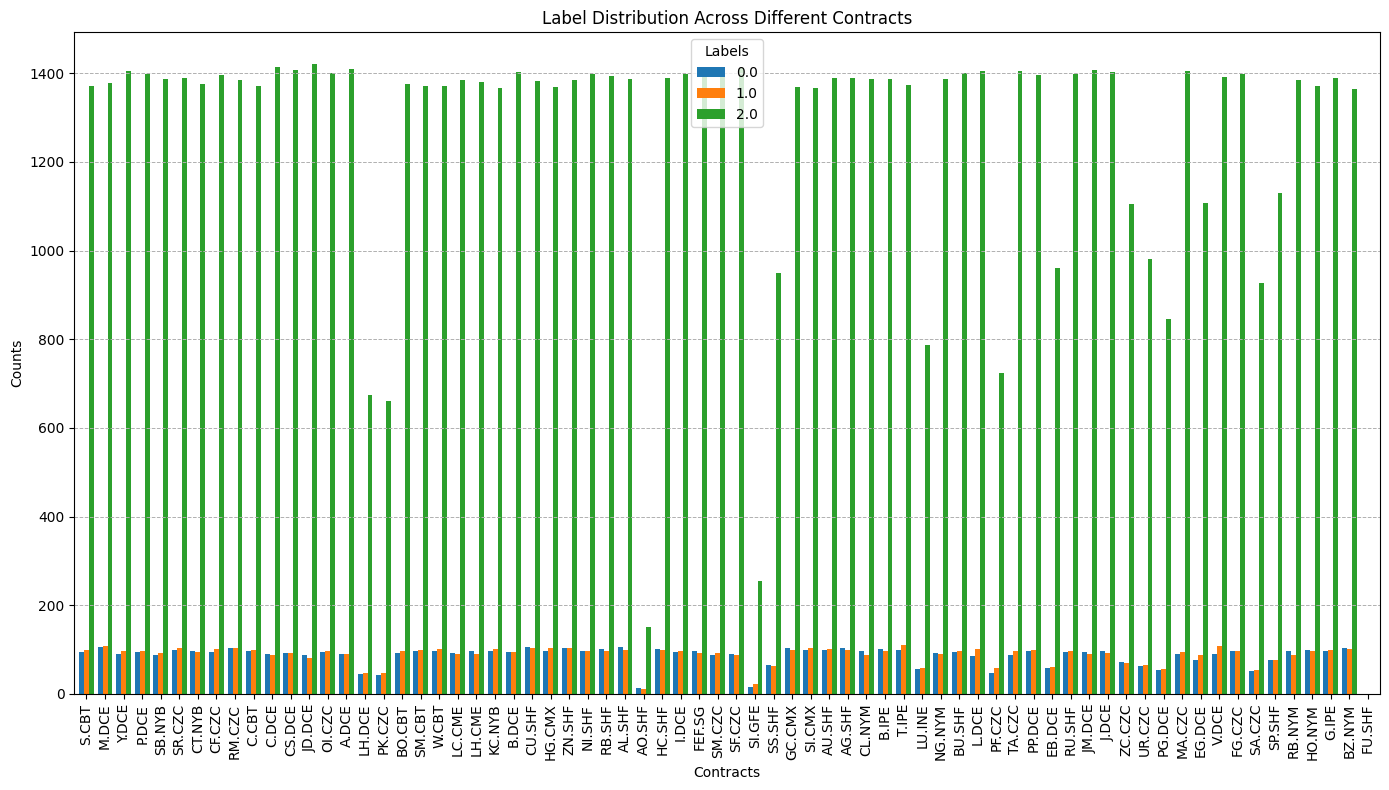

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 初始化一个空字典来存储每个合约的标签分布
label_distributions = {}

# 遍历每个合约代码，加载数据，计算标签分布
for code in filtered_codes_by_oi_mean:
    file_path = f"{code}_technical.csv"  # 假设标签数据保存在这些文件中
    data = pd.read_csv(file_path)
    label_distribution = data['label'].value_counts()  # 计算标签的绝对数
    label_distributions[code] = label_distribution

# 创建一个新的DataFrame来存储所有合约的标签分布数据
df_distributions = pd.DataFrame(label_distributions).T.fillna(0)

# 绘制条形图
df_distributions.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Label Distribution Across Different Contracts')
plt.ylabel('Counts')
plt.xlabel('Contracts')
plt.legend(title='Labels')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import defaultdict

# 初始化字典来存储每个品种的数据
data_dict = defaultdict(lambda: defaultdict(list))


# 初始化存储容器
scalers = {}  # 用于存储每个品种的scaler
all_X_train = []
all_X_test = []
all_y_train = []
all_y_test = []
all_dates = []  # 保存每个样本的日期范围
all_varieties = []  # 保存每个样本的品种信息

lookback_days = 20

for code in  filtered_codes_by_oi_mean:
    file_path = f"{code}_technical.csv"
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"文件 {file_path} 未找到，跳过此文件。")
        continue

    # 转换第一列为日期格式并按日期排序
    data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])
    data = data.sort_values(data.columns[0])

    if len(data) < lookback_days:  # 如果数据量小于回溯天数
        print(f"数据集 {code} 太小，无法创建有效的训练集。跳过此数据集。")
        continue
        
    # 添加品种代码作为特征
    data['Variety'] = code

    features = []
    labels = []
  
    # 选择除了标签、变化百分比和日期之外的所有列作为特征
    feature_columns = data.columns[1:-2]
    local_dates = []
    # 创建输入-输出对
    for i in range(lookback_days, len(data)):
        window = data.iloc[i - lookback_days:i][feature_columns].values
        label = data.iloc[i, -2]
        features.append(window)
        labels.append(label)
        end_date = data.iloc[i, 0]  # 窗口结束日期
        local_dates.append(end_date.strftime('%Y-%m-%d'))  # 转换为字符串格式并保存
        all_dates.append(end_date.strftime('%Y-%m-%d')) 
        all_varieties.append(code)  # 保存品种
    data_dict[code]['dates'] = local_dates     
    X = np.array(features)
    y = np.array(labels)

    # 分割数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    X_train = X_train.reshape((*X_train.shape, 1))
    X_test = X_test.reshape((*X_test.shape, 1))
    # 将处理后的数据添加到列表中
    all_X_train.append(X_train)
    all_X_test.append(X_test)
    all_y_train.append(y_train)
    all_y_test.append(y_test)
     # 保存数据
    data_dict[code]['X_train'] = X_train
    data_dict[code]['X_test'] = X_test
    data_dict[code]['y_train'] = y_train
    data_dict[code]['y_test'] = y_test
    # 由于切片操作会减少数据量，需要对日期进行相应的切分以保持一致
    split_index = len(y) - len(y_test)  # 计算切分点
    data_dict[code]['dates_train'] = data_dict[code]['dates'][:split_index]
    data_dict[code]['dates_test'] = data_dict[code]['dates'][split_index:]

# 使用np.concatenate来合并数据
X_train_combined = np.concatenate(all_X_train, axis=0)
X_test_combined = np.concatenate(all_X_test, axis=0)
y_train_combined = np.concatenate(all_y_train, axis=0)
y_test_combined = np.concatenate(all_y_test, axis=0)

数据集 FU.SHF 太小，无法创建有效的训练集。跳过此数据集。


In [35]:
# Check the shapes of the resulting arrays
X_train_combined.shape, X_test_combined.shape, y_train_combined.shape, y_test_combined.shape

((68879, 20, 19, 1), (29578, 20, 19, 1), (68879,), (29578,))

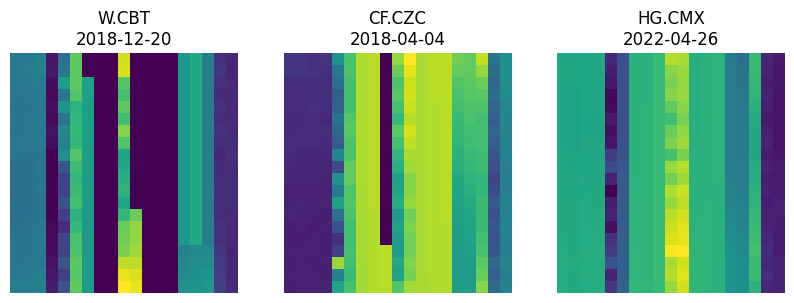

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom

# 随机选择三个样本的索引
indices = np.random.choice(X_train_combined.shape[0], 3, replace=False)

# 创建一个图和三个子图 (axs) 的网格
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# 遍历所选的每个索引和对应的子图
for i, ax in zip(indices, axs.flatten()):
    # 从训练集中获取对应的样本
    # 注意: 我们需要使用squeeze()方法去掉大小为1的维度，使得imshow能够正常工作
    image = X_train_combined[i].squeeze()

    # 将图像数据从0-1缩放到0-255，并转换为整数
    image_scaled = (image * 255).astype(np.uint8)
    
    # 使用灰度色彩映射显示图像
    ax.imshow(image_scaled, cmap='viridis')
    
    title = f'{all_varieties[i]}\n{all_dates[i]}'
    # 设置图像的标题为样本的索引
    ax.set_title(title)
    
    # 关闭坐标轴显示
    ax.axis('off')

# 显示图像
plt.show()


In [37]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

def get_sample_weights(y):
    """
    计算基于类权重的样本权重。用于处理不平衡数据和一热编码预测的模型。

    参数:
        y: 类标签为整数
    """

    y_int = y.astype(int)  # compute_class_weight需要整数标签
    class_weights = compute_class_weight('balanced', classes=np.unique(y_int), y=y_int)

    print("真实类权重为 {}".format(class_weights), np.unique(y_int))
    print("值计数", np.unique(y_int, return_counts=True))
    
    sample_weights = np.array([class_weights[class_label] for class_label in y_int])

    return sample_weights
    
sample_weights =  get_sample_weights(y_train_combined)


真实类权重为 [5.49537259 5.42268934 0.37970573] [0 1 2]
值计数 (array([0, 1, 2]), array([ 4178,  4234, 60467], dtype=int64))


In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader


#  y_train_combined 和 y_test_combined 已经是整数标签
y_train_tensor = torch.tensor(y_train_combined, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_combined, dtype=torch.long)
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)

X_train_tensor = X_train_tensor.permute(0, 3, 1, 2)  # 从 [batch, height, width, channels] 转换为 [batch, channels, height, width]
X_test_tensor = X_test_tensor.permute(0, 3, 1, 2)    # 同上

# 然后创建TensorDataset和DataLoader，如之前所示


# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)


In [39]:
print(f"Training samples: {len(train_dataset)}, Batches: {len(train_loader)}")
print(f"Testing samples: {len(test_dataset)}, Batches: {len(test_loader)}")

Training samples: 68879, Batches: 1076
Testing samples: 29578, Batches: 462


In [44]:

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=2, padding=1)  # 假设输入通道为1
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 *5 * 5, 30)  # 根据池化层后的维度调整
        self.fc2 = nn.Linear(30, 3)  # 有3个类别
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)  # 调整尺寸以匹配全连接层的输入
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [45]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

# 假设X_train_tensor, y_train_tensor已经准备好
# sample_weights是从您的get_sample_weights函数计算得到的

# 将样本权重转换为Tensor
sample_weights_tensor = torch.from_numpy(sample_weights).double()

# 使用WeightedRandomSampler
sampler = WeightedRandomSampler(sample_weights_tensor, len(sample_weights_tensor), replacement=True)

# 创建TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# 创建带有sampler的DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, sampler=sampler)

# 实例化模型、定义损失函数和优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 128
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.1016242504119873
Epoch 2, Loss: 1.064871072769165
Epoch 3, Loss: 0.866247296333313
Epoch 4, Loss: 0.9853422045707703
Epoch 5, Loss: 0.9881650805473328
Epoch 6, Loss: 0.8919888138771057
Epoch 7, Loss: 0.8526982665061951
Epoch 8, Loss: 0.8959388136863708
Epoch 9, Loss: 1.106478214263916
Epoch 10, Loss: 0.6791616678237915
Epoch 11, Loss: 0.8592025637626648
Epoch 12, Loss: 0.7619037628173828
Epoch 13, Loss: 0.8192299008369446
Epoch 14, Loss: 0.8590571284294128
Epoch 15, Loss: 0.9096023440361023
Epoch 16, Loss: 0.9562054872512817
Epoch 17, Loss: 0.788748562335968
Epoch 18, Loss: 0.7138605713844299
Epoch 19, Loss: 0.8297894597053528
Epoch 20, Loss: 0.7538270950317383
Epoch 21, Loss: 0.9014197587966919
Epoch 22, Loss: 0.9559681415557861
Epoch 23, Loss: 0.8973902463912964
Epoch 24, Loss: 0.7638094425201416
Epoch 25, Loss: 0.7029434442520142
Epoch 26, Loss: 0.9201872944831848
Epoch 27, Loss: 0.8018620014190674
Epoch 28, Loss: 0.8863604068756104
Epoch 29, Loss: 0.689280331134796

In [46]:
model.eval()  # 设置模型为评估模式
correct = 0
total = 0
with torch.no_grad():  # 在评估阶段不计算梯度
    for data, targets in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f'Accuracy on test set: {accuracy:.4f}')


Accuracy on test set: 0.1869


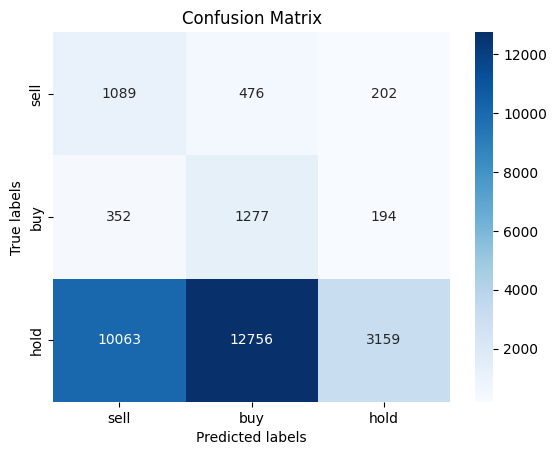

In [47]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 确保模型处于评估模式
model.eval()

# 收集所有预测和标签
all_preds = []
all_targets = []

with torch.no_grad():
    for data, targets in test_loader:
        outputs = model(data)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# 计算混淆矩阵
cm = confusion_matrix(all_targets, all_preds)

# 假设您知道每个整数标签对应的原始类别名称
original_classes = ['sell', 'buy', 'hold']

# 直接使用原始类别名称作为混淆矩阵的轴标签
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=original_classes, yticklabels=original_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [20]:
lookback_days = 20

code = "I.DCE"
file_path = f"{code}_technical.csv"
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"文件 {file_path} 未找到，跳过此文件。")
    continue

# 转换第一列为日期格式并按日期排序
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])
data = data.sort_values(data.columns[0])


if len(data) < lookback_days:  # 如果数据量小于回溯天数
    print(f"数据集 {code} 太小，无法创建有效的训练集。跳过此数据集。")
    continue
    
features = []
labels = []
date = []

# 选择除了标签、变化百分比和日期之外的所有列作为特征
feature_columns = data.columns[1:-2]

# 创建输入-输出对
for i in range(lookback_days, len(data)):
    window = data.iloc[i - lookback_days:i][feature_columns].values
    label = data.iloc[i, -2]
    features.append(window)
    labels.append(label)
    date = data.iloc[i, 0]  # 窗口结束日期
  
X = np.array(features)
y = np.array(labels)

In [21]:
# 调整维度并转换为Tensor
X_tensor = torch.tensor(data_test, dtype=torch.float).permute(0, 3, 1, 2)

# 将数据封装成 DataLoader
dataset = TensorDataset(X_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=False)


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 3 is not equal to len(dims) = 4

In [ ]:
model.eval()  # 确保模型处于评估模式
recent_predictions = []  # 用于存储最近128天的预测结果

with torch.no_grad():  # 禁用梯度计算
    for X_batch in loader:
        X_batch = X_batch[0]  # DataLoader 返回的是一个元组，我们只需要数据部分
        output = model(X_batch)
        _, predicted_labels = torch.max(output, 1)  # 获取每个样本最可能的预测标签
        recent_predictions.extend(predicted_labels.cpu().numpy())


In [ ]:
# 确保预测结果的数量与最近128天的日期数量一致
assert len(recent_predictions) == len(dates_recent_cu), "预测结果的数量与测试集中的日期数量不一致。"

# 打印每一天的预测结果及其对应的日期
for date, prediction in zip(dates_recent_cu, recent_predictions):
    print(f"日期: {date}, 预测标签: {prediction}")


In [ ]:
# 假设 recent_predictions 是一个列表，包含预测结果，我们将模拟一些数据来展示如何查看其分布
import numpy as np
import matplotlib.pyplot as plt



# 绘制分布图
plt.figure(figsize=(10, 6))
plt.hist(prediction, bins=np.arange(-0.5, 3, 1), rwidth=0.8)
plt.xticks([0, 1, 2])
plt.title("Predictions Distribution")
plt.xlabel("Prediction Label")
plt.ylabel("Frequency")
plt.show()
